In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/player_stats_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12952 entries, 0 to 12951
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12952 non-null  int64  
 1   name            12952 non-null  object 
 2   dateOfBirth     12952 non-null  object 
 3   Age             12952 non-null  int64  
 4   Height          12952 non-null  float64
 5   Foot            12952 non-null  object 
 6   Position        12952 non-null  object 
 7   OtherPosition   12952 non-null  object 
 8   National        12952 non-null  object 
 9   MarketValue     12952 non-null  float64
 10  Outfitter       3058 non-null   object 
 11  Club_name       12952 non-null  object 
 12  ContractExpiry  12952 non-null  object 
 13  ContractOption  1322 non-null   object 
 14  20YC            12952 non-null  int64  
 15  20YC2           12952 non-null  int64  
 16  20RC            12952 non-null  int64  
 17  20G             12952 non-null 

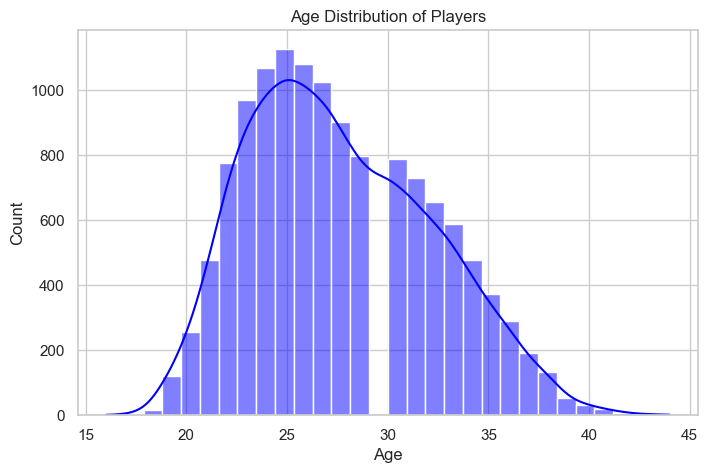

In [3]:
# 1. Distribution of Player Ages
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Players")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

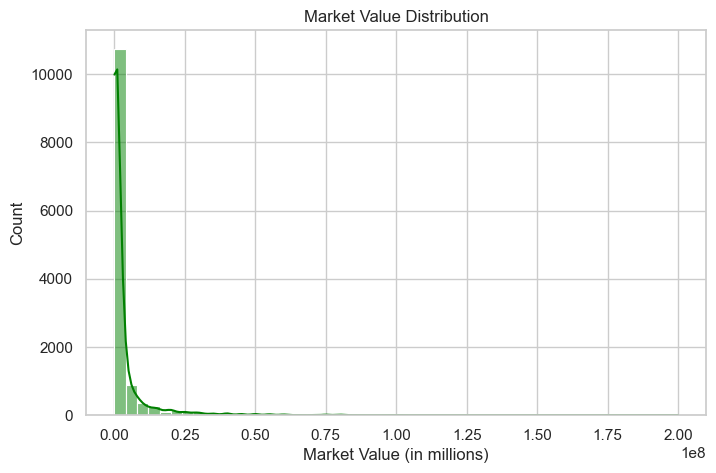

In [4]:
# 2. Distribution of Market Values
plt.figure(figsize=(8, 5))
sns.histplot(df['MarketValue'], bins=50, kde=True, color='green')
plt.title("Market Value Distribution")
plt.xlabel("Market Value (in millions)")
plt.ylabel("Count")
plt.show()

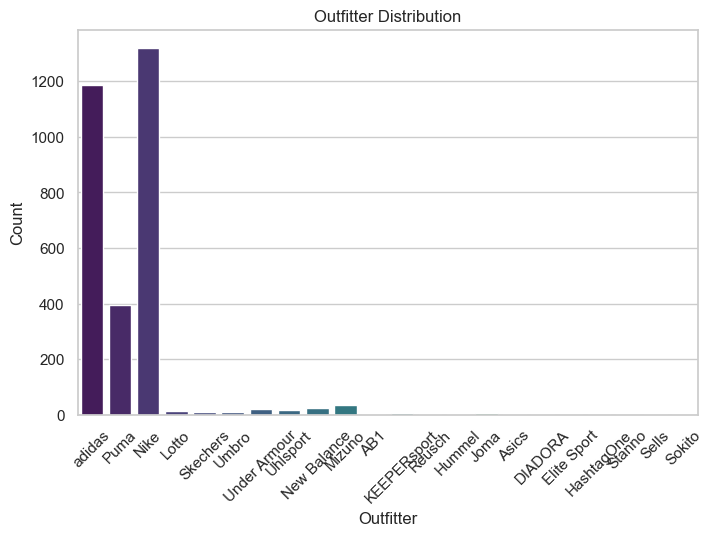

In [5]:
# 3. Plot outfitter distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Outfitter', data=df, palette='viridis')
plt.title("Outfitter Distribution")
plt.xlabel("Outfitter")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



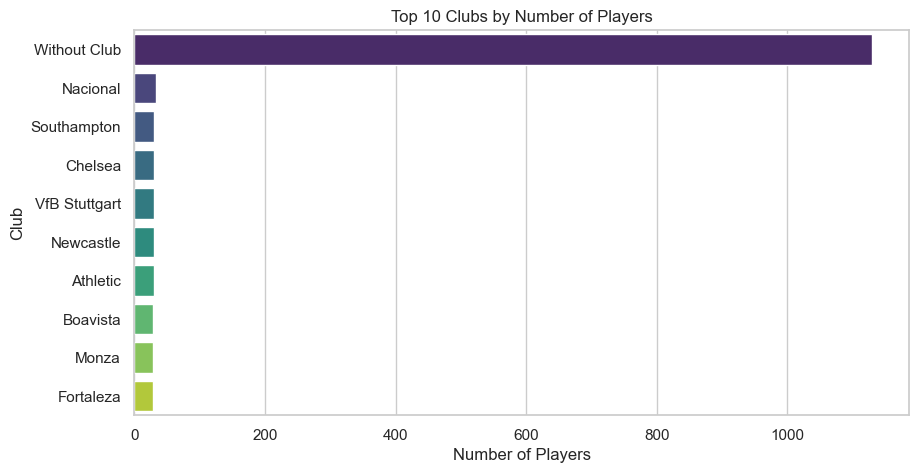

In [6]:
# 4. Top 10 Clubs by Player Count
top_clubs = df['Club_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='viridis')
plt.title("Top 10 Clubs by Number of Players")
plt.xlabel("Number of Players")
plt.ylabel("Club")
plt.show()

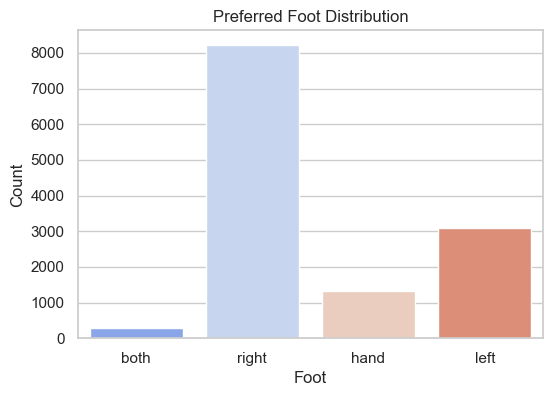

In [7]:
# 5. Preferred Foot Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Foot'], palette='coolwarm')
plt.title("Preferred Foot Distribution")
plt.xlabel("Foot")
plt.ylabel("Count")
plt.show()

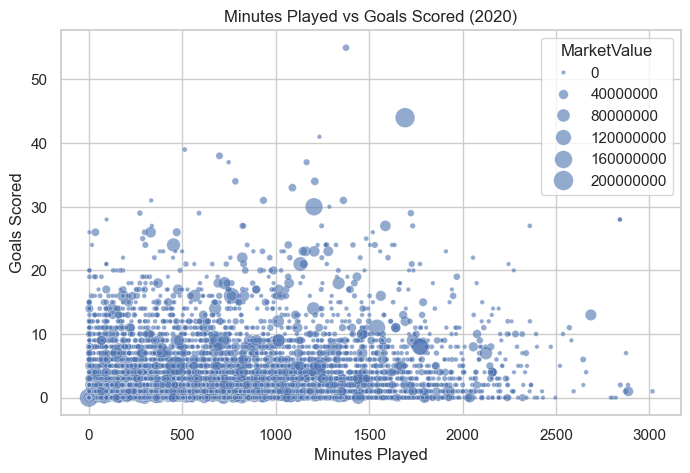

In [8]:
# 6. Goals vs. Minutes Played (Bubble Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['20MP'], y=df['20G'], size=df['MarketValue'], sizes=(10, 200), alpha=0.6)
plt.title("Minutes Played vs Goals Scored (2020)")
plt.xlabel("Minutes Played")
plt.ylabel("Goals Scored")
plt.show()

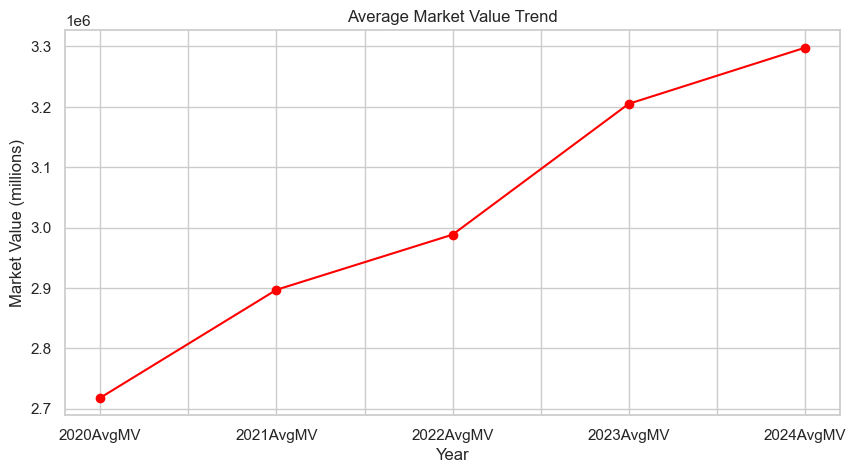

In [9]:
# 7. Market Value Over Years
plt.figure(figsize=(10, 5))
market_value_cols = ['2020AvgMV', '2021AvgMV', '2022AvgMV', '2023AvgMV', '2024AvgMV']
df[market_value_cols].mean().plot(marker='o', linestyle='-', color='red')
plt.title("Average Market Value Trend")
plt.xlabel("Year")
plt.ylabel("Market Value (millions)")
plt.show()

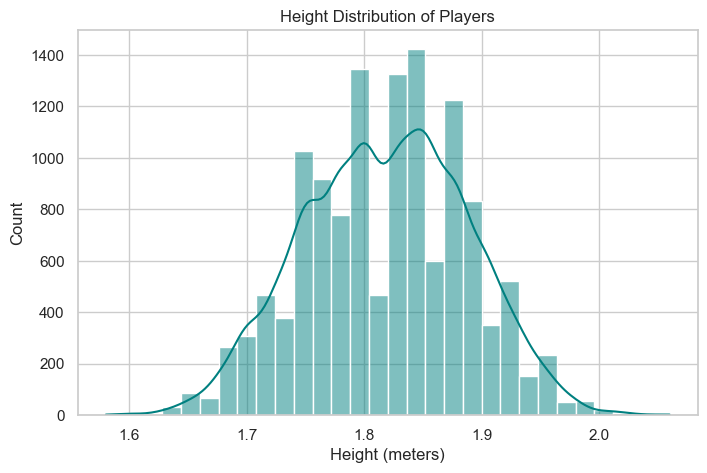

In [10]:
# 8. Height Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Height'], bins=30, kde=True, color='teal')
plt.title("Height Distribution of Players")
plt.xlabel("Height (meters)")
plt.ylabel("Count")
plt.show()

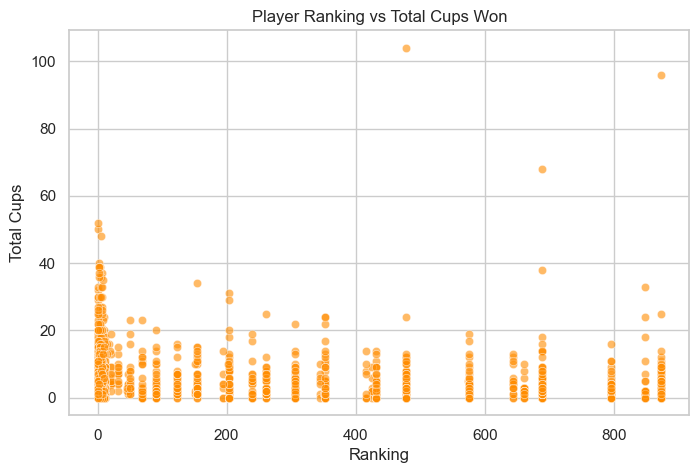

In [11]:
# 9. Ranking vs Total Cups Won
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Ranking'], y=df['TotalCups'], alpha=0.6, color='darkorange')
plt.title("Player Ranking vs Total Cups Won")
plt.xlabel("Ranking")
plt.ylabel("Total Cups")
plt.show()

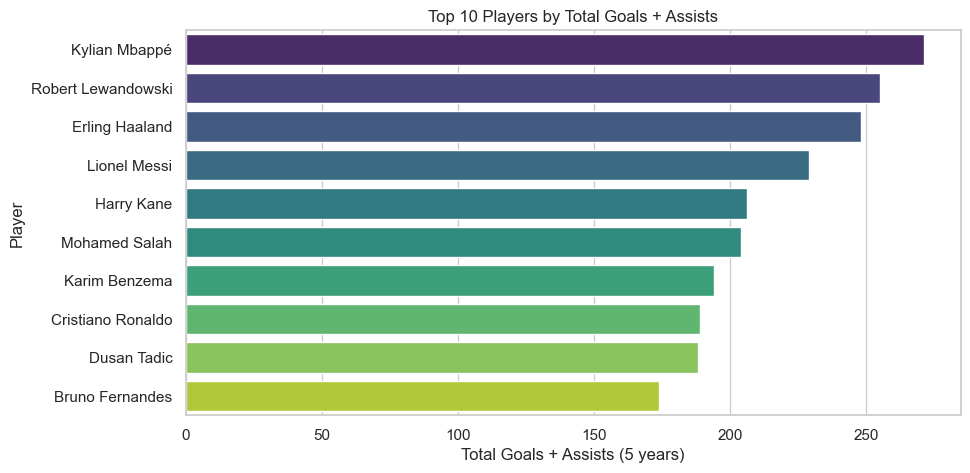

In [12]:
# Create a new column for Total Goals + Assists over 5 years
df['G/A'] = df[['20G', '21G', '22G', '23G', '24G']].sum(axis=1) + df[['20A', '21A', '22A', '23A', '24A']].sum(axis=1)

# 10. Top 10 Players by Total Goals + Assists
top_players = df.sort_values('G/A', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_players['G/A'], y=top_players['name'], palette='viridis')
plt.title("Top 10 Players by Total Goals + Assists")
plt.xlabel("Total Goals + Assists (5 years)")
plt.ylabel("Player")
plt.show()


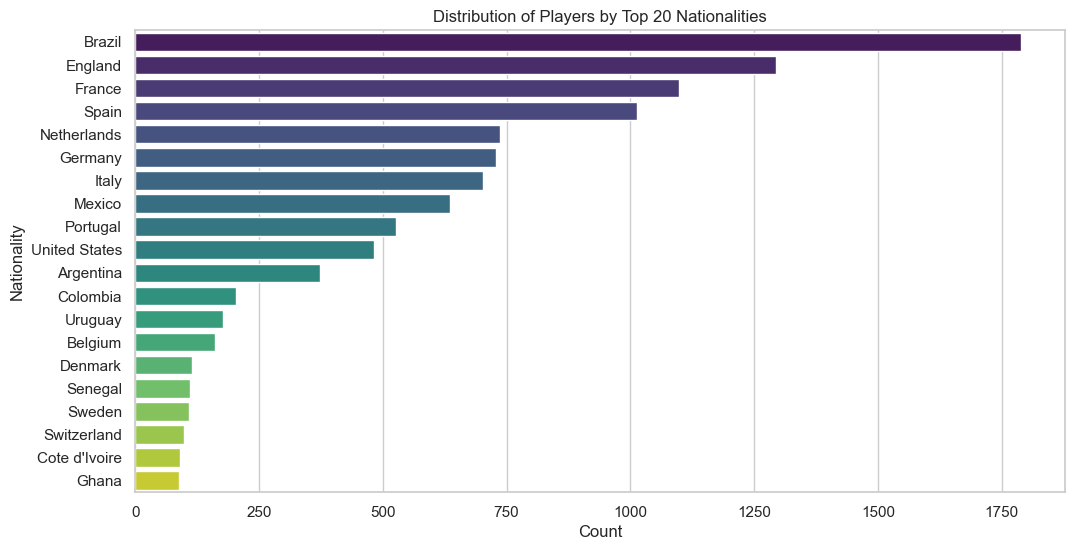

In [13]:
# 11. Distribution of Players by National
plt.figure(figsize=(12, 6))
top_20_nationalities = df['National'].value_counts().head(20).index
sns.countplot(y='National', data=df[df['National'].isin(top_20_nationalities)], order=top_20_nationalities, palette='viridis')
plt.title("Distribution of Players by Top 20 Nationalities")
plt.xlabel("Count")
plt.ylabel("Nationality")
plt.show()

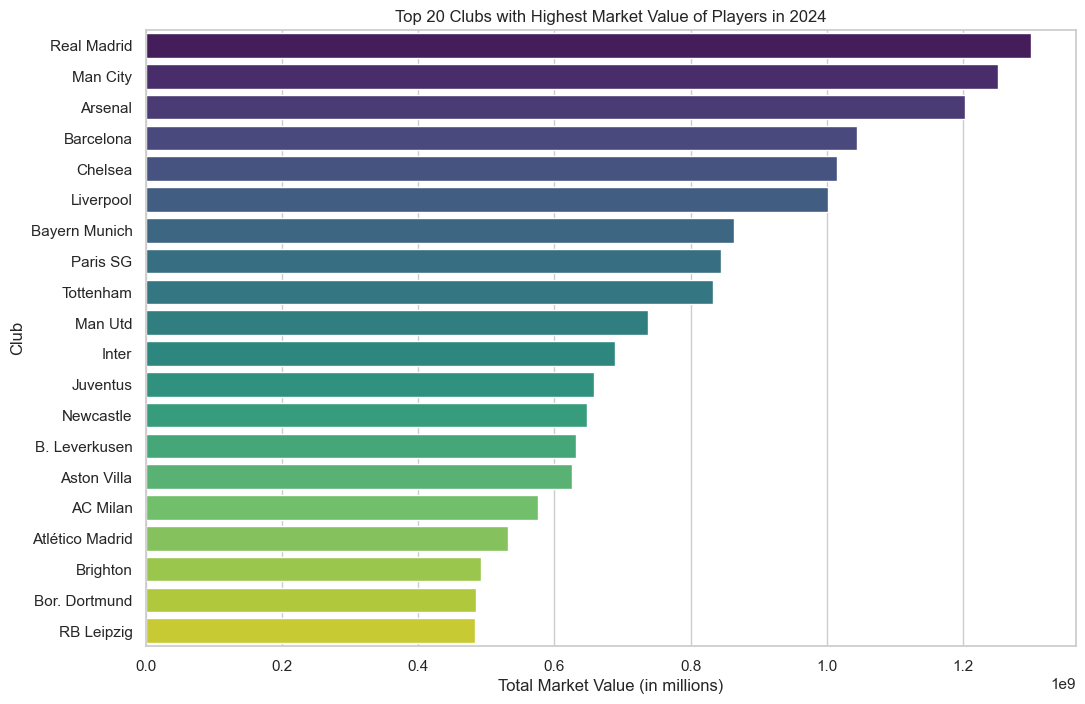

In [14]:
# 12. Top 20 Clubs with Highest Market Value of Players in 2024
top_20_clubs_market_value = df.groupby('Club_name')['2024AvgMV'].sum().nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_clubs_market_value.values, y=top_20_clubs_market_value.index, palette='viridis')
plt.title("Top 20 Clubs with Highest Market Value of Players in 2024")
plt.xlabel("Total Market Value (in millions)")
plt.ylabel("Club")
plt.show()

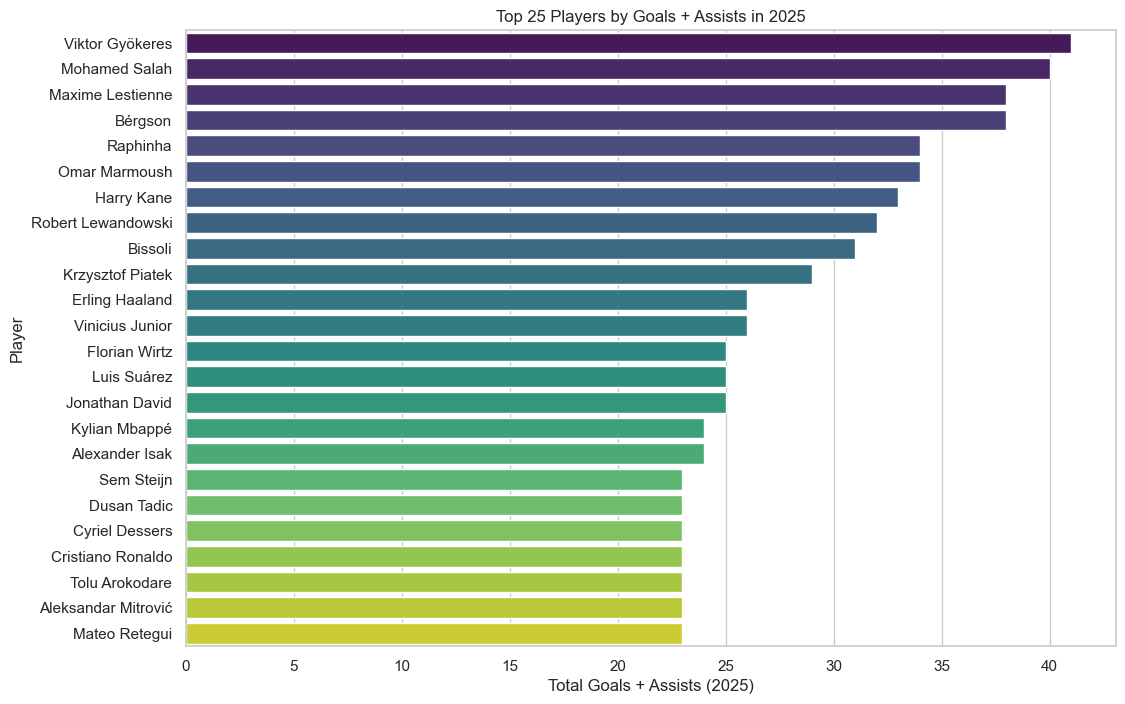

In [15]:
# 13. Top 25 players by Total Goals + Assists in 2025
df['G/A_2025'] = df['25G'] + df['25A']

# Get the top 25 players by Total Goals + Assists in 2025
top_25_players_2025 = df.sort_values('G/A_2025', ascending=False).head(25)

# Plot the top 25 players
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_players_2025['G/A_2025'], y=top_25_players_2025['name'], palette='viridis')
plt.title("Top 25 Players by Goals + Assists in 2025")
plt.xlabel("Total Goals + Assists (2025)")
plt.ylabel("Player")
plt.show()